#### Mô hình hoá dữ liệu vết đen mặt trời (sunspot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf, acf
from statsmodels.tsa.ar_model import AutoReg

In [3]:
# Tải dữ liệu vết đen mặt trời
sunspot = pd.read_excel("../Data/sunspot.xls").set_index("Year")
sunspot.head()

,Total sunspot number
Year,
1700,8.3
1701,18.3
1702,26.7
1703,38.3
1704,60.0


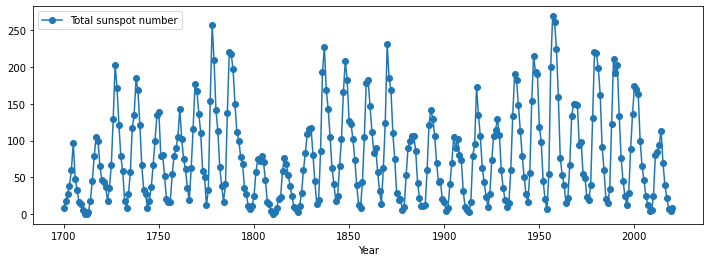

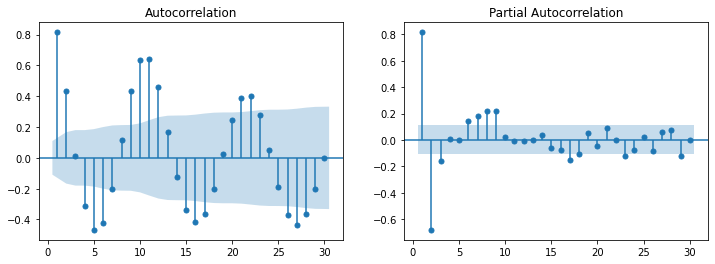

In [4]:
# Vẽ đồ thị đường dữ liệu
fig1, ax1 = plt.subplots(figsize=(12,4))
sunspot.plot(style='o-', linewidth=1.5, ax=ax1)

# Vẽ đồ thị ACFs, PACFs
fig2, ax2 = plt.subplots(1,2, figsize = (12,4))
fig = plot_acf(sunspot, lags = 30, zero = False, ax = ax2[0])
fig = plot_pacf(sunspot, lags = 30, zero = False, method = 'ywm', ax = ax2[1])

In [5]:
# Ước lượng mô hình AR(2) cho dữ liệu sunspot
model = AutoReg(sunspot.values, old_names=True, lags = 2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  321
Model:                     AutoReg(2)   Log Likelihood               -1488.238
Method:               Conditional MLE   S.D. of innovations             25.697
Date:                Thu, 14 Dec 2023   AIC                              6.518
Time:                        21:46:11   BIC                              6.565
Sample:                             2   HQIC                             6.537
                                  321                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.2716      2.403     10.102      0.000      19.563      28.981
y.L1           1.3853      0.040     34.302      0.000       1.306       1.464
y.L2          -0.6929      0.040    -17.154      0.000      -0.772      -0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9996           -0.6663j            1.2013           -0.0936
AR.2            0.9996           +0.6663j            1.2013            0.0936
-----------------------------------------------------------------------------
"""

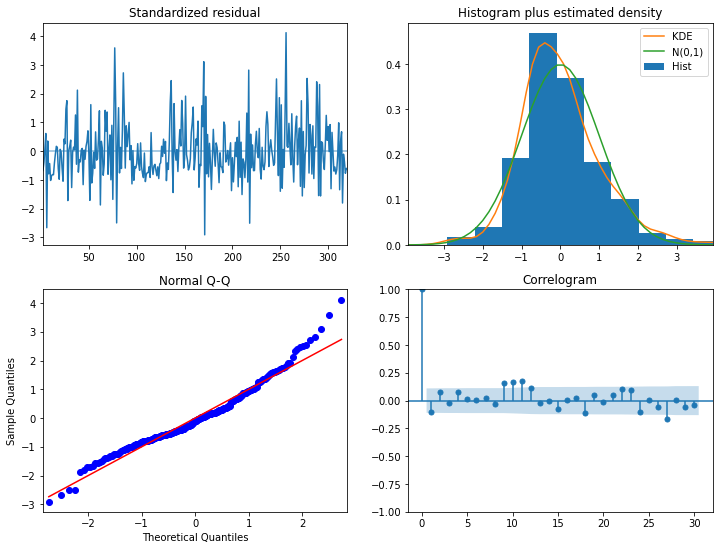

In [6]:
# Phân tích phần dư bằng hình ảnh
fig = result.plot_diagnostics(fig=plt.figure(figsize=(12,9)), lags=30)

In [7]:
# Tính phần dư mô hình AR(2) cho dữ liệu sunspot
resid = result.resid

# Tình qstat với các độ trễ khác nhau
r, q , p = acf(resid, nlags=30, qstat= True, fft=False) # Output: [acf, qstat, p-value]

# Biểu diễn bảng
pd.DataFrame(np.array([np.arange(1,31,4), r[1::4], q[::4], p[::4]]).T,
             columns=['lag','acf','qstat','p-value']).set_index('lag')

,acf,qstat,p-value
lag,,,
1.0,-0.099450,3.184761,0.074328
5.0,0.018140,7.163279,0.208777
9.0,0.156872,15.787305,0.071458
13.0,-0.017367,39.692217,0.000155
17.0,0.019223,41.577586,0.000772
21.0,0.049570,47.366468,0.000838
25.0,0.009868,58.114275,0.000189
29.0,-0.057899,70.025625,0.000030


In [8]:
from statsmodels.tsa.ar_model import ar_select_order

# Lựa chọn bậc của mô hình AR theo tiêu chuẩn AIC
order = ar_select_order(sunspot.values, old_names=True, maxlag=15)
order.aic 

{(1, 2, 3, 4, 5, 6, 7, 8, 9): 6.379864867315845,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 6.386212723931022,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 6.392638209726299,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 6.399092340951648,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13): 6.405617348268485,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14): 6.409937301974755,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15): 6.413402744996783,
 (1, 2, 3, 4, 5, 6, 7, 8): 6.422643696613707,
 (1, 2, 3, 4, 5, 6, 7): 6.46509481013544,
 (1, 2, 3): 6.496091652553745,
 (1, 2, 3, 4, 5, 6): 6.499477876402026,
 (1, 2, 3, 4): 6.502616227819395,
 (1, 2, 3, 4, 5): 6.508658214288363,
 (1, 2): 6.513646763752936,
 (1,): 7.1866875241206944,
 0: 8.264034227558467}

In [9]:
# Ước lượng tham số của mô hình
result = order.model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  321
Model:                     AutoReg(9)   Log Likelihood               -1426.061
Method:               Conditional MLE   S.D. of innovations             23.377
Date:                Thu, 14 Dec 2023   AIC                              6.374
Time:                        21:46:12   BIC                              6.506
Sample:                             9   HQIC                             6.427
                                  321                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.2253      4.059      3.012      0.003       4.269      20.181
y.L1           1.1702      0.055     21.199      0.000       1.062       1.278
y.L2          -0.4193      0.086     -4.866      0.000      -0.588      -0.250
y.L3          -0.1327      0.089     -1.493      0.136      -0.307       0.042
y.L4           0.1023      0.088      1.157      0.247      -0.071       0.276
y.L5          -0.0684      0.088     -0.774      0.439      -0.242       0.105
y.L6           0.0024      0.088      0.027      0.978      -0.171       0.176
y.L7           0.0217      0.088      0.246      0.806      -0.152       0.195
y.L8          -0.0502      0.085     -0.588      0.557      -0.218       0.117
y.L9           0.2219      0.055      4.048      0.000       0.114       0.329
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0673           -0.0000j            1.0673           -0.0000
AR.2            0.8504           -0.5735j            1.0257           -0.0944
AR.3            0.8504           +0.5735j            1.0257            0.0944
AR.4            0.4193           -1.0986j            1.1759           -0.1920
AR.5            0.4193           +1.0986j            1.1759            0.1920
AR.6           -1.2146           -0.4664j            1.3010           -0.4416
AR.7           -1.2146           +0.4664j            1.3010            0.4416
AR.8           -0.4756           -1.2201j            1.3095           -0.3092
AR.9           -0.4756           +1.2201j            1.3095            0.3092
-----------------------------------------------------------------------------
"""

In [10]:
# Ước lượng tham số của mô hình AR(9) rút gọn
model = AutoReg(sunspot.values, lags = [1,2,9])
result = model.fit()
result.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  321
Model:              Restr. AutoReg(9)   Log Likelihood               -1428.272
Method:               Conditional MLE   S.D. of innovations             23.544
Date:                Thu, 14 Dec 2023   AIC                              6.350
Time:                        21:46:12   BIC                              6.410
Sample:                             9   HQIC                             6.374
                                  321                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.6000      3.082      2.791      0.005       2.560      14.640
y.L1           1.2230      0.043     28.296      0.000       1.138       1.308
y.L2          -0.5226      0.044    -11.889      0.000      -0.609      -0.436
y.L9           0.1927      0.025      7.580      0.000       0.143       0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0474           -0.0000j            1.0474           -0.0000
AR.2            0.8503           -0.5821j            1.0305           -0.0955
AR.3            0.8503           +0.5821j            1.0305            0.0955
AR.4            0.4132           -1.1093j            1.1838           -0.1933
AR.5            0.4132           +1.1093j            1.1838            0.1933
AR.6           -0.5107           -1.2180j            1.3207           -0.3132
AR.7           -0.5107           +1.2180j            1.3207            0.3132
AR.8           -1.2765           -0.5287j            1.3816           -0.4375
AR.9           -1.2765           +0.5287j            1.3816            0.4375
-----------------------------------------------------------------------------
"""

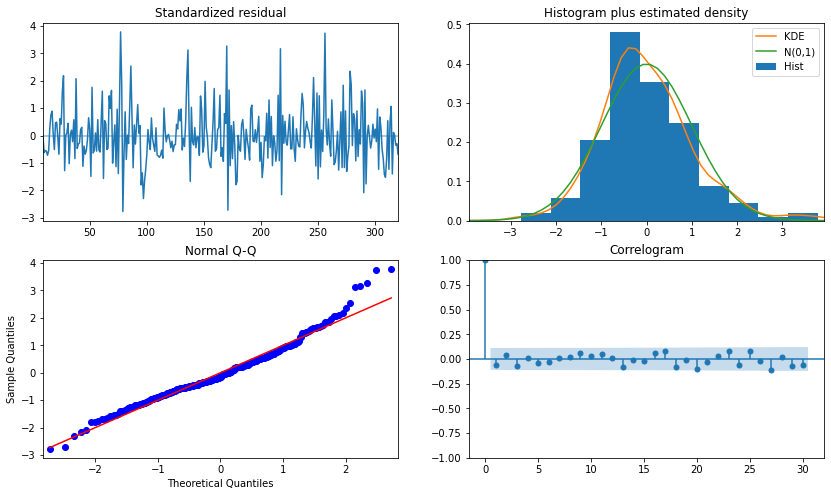

In [11]:
# Phân tích phần dư của mô hình AR(9) rút gọn
fig = result.plot_diagnostics(fig=plt.figure(figsize=(14,8)), lags=30)

In [12]:
# Tính phần dư mô hình AR(9) rút gọn
resid = result.resid

# Tình qstat với các độ trễ khác nhau
r, q , p = acf(resid, nlags=30, qstat= True) # Output: [acf, qstat, p-value]

# Biểu diễn bảng
pd.DataFrame(np.array([np.arange(1,31,4), r[1::4], q[::4], p[::4]]).T,
             columns=['lag','acf','qstat','p-value']).set_index('lag')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,acf,qstat,p-value
lag,,,
1.0,-0.059098,1.100201,0.294222
5.0,-0.040638,3.649256,0.600933
9.0,0.060520,5.269349,0.810225
13.0,-0.084317,8.780724,0.789295
17.0,0.084745,12.429403,0.773467
21.0,-0.032965,18.474615,0.618803
25.0,0.075972,24.488609,0.491306
29.0,-0.070393,30.980191,0.366359
